In [1]:
import pandas as pd
import numpy as np
import sys
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# plt.style.use('seaborn-whitegrid')
import os
from datetime import date

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야함.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당.
a = get_font_family()
# 폰트설정
import matplotlib.pyplot as plt 
plt.rc("font", family = a)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# ggplot으로 그래프 스타일 설정
#plt.style.use("ggplot")


In [37]:
df_ori = pd.read_excel("클로젯셰어_과제DB 대체 자료.xlsx")

In [38]:
df = df_ori.copy()

In [39]:
df['app_yn'].fillna('N', inplace=True)

In [40]:
df.dropna(inplace=True)
print(df.isnull().sum())
print(df.info())

brandnm       0
goodsnm       0
USER          0
reg_date      0
order_date    0
p_type        0
sub_type      0
app_yn        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437 entries, 0 to 1470
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   brandnm     1437 non-null   object        
 1   goodsnm     1437 non-null   object        
 2   USER        1437 non-null   object        
 3   reg_date    1437 non-null   datetime64[ns]
 4   order_date  1437 non-null   datetime64[ns]
 5   p_type      1437 non-null   object        
 6   sub_type    1437 non-null   object        
 7   app_yn      1437 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 101.0+ KB
None


In [41]:
#유저로 묶고 
#order_date중 가장 낮은 값 사용 

df.set_index("USER", inplace=True)
FirstOrder = df.groupby(df.index)["order_date"].min()
df['FirstOrder'] = FirstOrder
df.head(2)

,brandnm,goodsnm,reg_date,order_date,p_type,sub_type,app_yn,FirstOrder
USER,,,,,,,,
a161237,Gucci,flower dionysus shoulder bag beige,2019-12-06,2021-01-15,7days,BA,Y,2021-01-15
a1140859,El estilo de Claire,beads cropped jacket black,2021-01-02,2021-01-15,4days,O,N,2021-01-15


In [42]:
How_Long = df["FirstOrder"] - df["reg_date"]
df["How_Long"] = How_Long
df.head(3)

,brandnm,goodsnm,reg_date,order_date,p_type,sub_type,app_yn,FirstOrder,How_Long
USER,,,,,,,,,
a161237,Gucci,flower dionysus shoulder bag beige,2019-12-06,2021-01-15,7days,BA,Y,2021-01-15,406 days
a1140859,El estilo de Claire,beads cropped jacket black,2021-01-02,2021-01-15,4days,O,N,2021-01-15,13 days
a1140859,Danha,embroidery point oriental mini skirt blue,2021-01-02,2021-01-15,4days,B,N,2021-01-15,13 days


In [43]:
df.reset_index(inplace=True)
df.head(2)

,USER,brandnm,goodsnm,reg_date,order_date,p_type,sub_type,app_yn,FirstOrder,How_Long
0,a161237,Gucci,flower dionysus shoulder bag beige,2019-12-06,2021-01-15,7days,BA,Y,2021-01-15,406 days
1,a1140859,El estilo de Claire,beads cropped jacket black,2021-01-02,2021-01-15,4days,O,N,2021-01-15,13 days


In [44]:
First_Day = df["FirstOrder"].min()

# 그룹 선언

In [46]:
df["How_Long"] = df["How_Long"].astype('timedelta64[D]').astype(int)

In [50]:
df.head(3)

,USER,brandnm,goodsnm,reg_date,order_date,p_type,sub_type,app_yn,FirstOrder,How_Long
0,a161237,Gucci,flower dionysus shoulder bag beige,2019-12-06,2021-01-15,7days,BA,Y,2021-01-15,406
1,a1140859,El estilo de Claire,beads cropped jacket black,2021-01-02,2021-01-15,4days,O,N,2021-01-15,13
2,a1140859,Danha,embroidery point oriental mini skirt blue,2021-01-02,2021-01-15,4days,B,N,2021-01-15,13


In [51]:
df.query('405 < How_Long < 407')

,USER,brandnm,goodsnm,reg_date,order_date,p_type,sub_type,app_yn,FirstOrder,How_Long
0,a161237,Gucci,flower dionysus shoulder bag beige,2019-12-06,2021-01-15,7days,BA,Y,2021-01-15,406
387,a174601,Akro,strap basic pattern trench-coat beige,2020-01-17,2021-02-26,4days,O,Y,2021-02-26,406


## df_TS 등급 0~3일

In [122]:
df_TS = df.query('0 <= How_Long <= 3')

In [123]:
df_TS.drop(["order_date","reg_date","FirstOrder"], axis=1, inplace=True)

## df_TA 등급 4~200일

In [58]:
df_TA = df.query('4 <= How_Long <= 200')

In [59]:
df_TA.drop(["order_date","reg_date","FirstOrder"], axis=1, inplace=True)

## df_TB 등급 200~600일

In [60]:
df_TB = df.query('200 < How_Long <= 600')

In [61]:
df_TB.drop(["order_date","reg_date","FirstOrder"], axis=1, inplace=True)

## df_TC 등급 600일 이상

In [62]:
df_TC = df.query('600 < How_Long')

In [64]:
df_TC.drop(["order_date","reg_date","FirstOrder"], axis=1, inplace=True)

### brandnm컬럼 비교 분석

#### TS

In [124]:
df_TS_value = pd.DataFrame(df_TS["brandnm"].value_counts()).sort_index(ascending=False)

In [78]:
df_TS_value = df_TS_value[df_TS_value["brandnm"] > 3]

<AxesSubplot:>

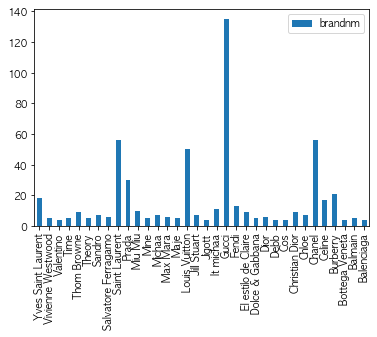

In [79]:
df_TS_value.plot(kind="bar")

#### TA

In [106]:
df_TA_value = pd.DataFrame(df_TA["brandnm"].value_counts()).sort_index(ascending=False)

In [107]:
df_TA_value = df_TA_value[df_TA_value['brandnm']>3]

<AxesSubplot:>

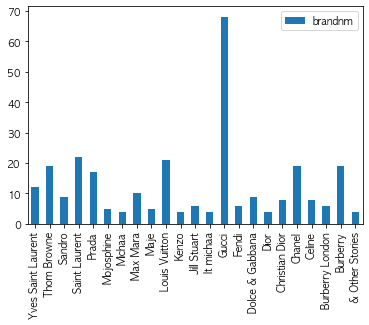

In [108]:
df_TA_value.plot(kind="bar")

#### TB

<AxesSubplot:>

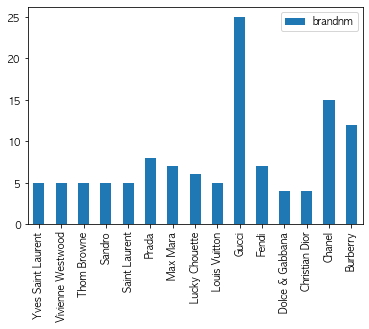

In [109]:
df_TB_value = pd.DataFrame(df_TB["brandnm"].value_counts()).sort_index(ascending=False)
df_TB_value = df_TB_value[df_TB_value['brandnm']>3]
df_TB_value.plot(kind="bar")

#### TC

<AxesSubplot:>

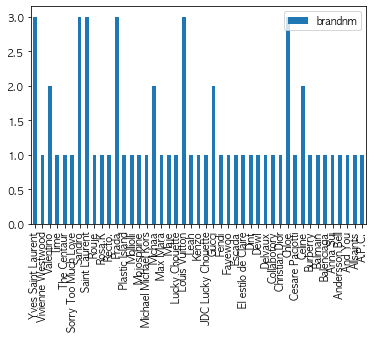

In [115]:
df_TC_value = pd.DataFrame(df_TC["brandnm"].value_counts()).sort_index(ascending=False)
df_TC_value = df_TC_value[df_TC_value['brandnm']>=1]
df_TC_value.plot(kind="bar")

<AxesSubplot:>

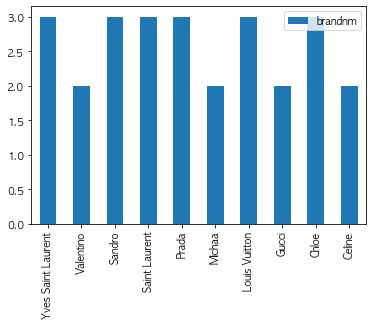

In [116]:
df_TC_value = pd.DataFrame(df_TC["brandnm"].value_counts()).sort_index(ascending=False)
df_TC_value = df_TC_value[df_TC_value['brandnm']>=2]
df_TC_value.plot(kind="bar") #여기여

### TS - Gucci    

In [ ]:
df_TS_copy = df_TS.copy() #ttt

In [147]:
df_TS_copy = df_TS_copy .query('brandnm == "Gucci"')

#### TS - Gucci - goodsnm

In [156]:
df_TS_copy_goodsnm = pd.DataFrame(df_TS_copy["goodsnm"].value_counts())

<AxesSubplot:>

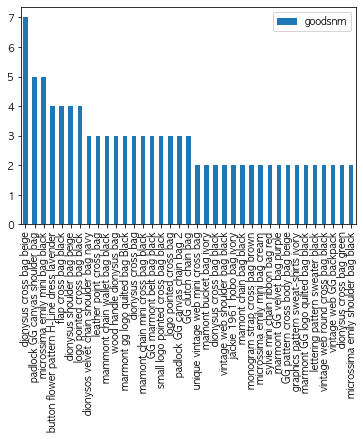

In [160]:
df_TS_copy_goodsnm[df_TS_copy_goodsnm["goodsnm"] >1].plot(kind="bar")

In [166]:
df_TS_copy_goodsnm["goodsnm"].index

Index(['dionysus cross bag beige', 'padlock GG canvas shoulder bag',
       'microssima emily mini bag black',
       'button flower pattern H-Line dress lavender', 'flap cross bag black',
       'dionysus shoulder bag beige', 'logo pointed cross bag black',
       'dionysos velvet chain shoulder bag navy', 'leather point cross bag',
       'mammont chain wallet bag black', 'wood handle dionysus bag',
       'marmont gg logo quilted bag Black', 'dionysus cross bag',
       'mamont chain mini cross bag black', 'GG marmont belt bag black',
       'small logo pointed cross bag black', 'logo pointed cross bag',
       'padlock GG canvas chain bag 2', 'GG clutch chain bag',
       'unique vintage web mini cross bag', 'mamont bucket bag ivory',
       'dionysus cross bag black', 'vintage web shoulder bag black',
       'jackie 1961 hobo bag ivory', 'mamont chain bag black',
       'monogram strap cross bag brown', 'microssima emily mini bag cream',
       'sylvie mini chain ribbon bag red', 

#### 위 차트가 TS 그룹이 가장 좋아하는 상품 목록 (가장 좋아하는 브랜드: 구찌, 구찌에서 2번 이상 구매한 상품 목록)

### 모집단 - Gucci

In [174]:
df_copy = df.copy()

In [175]:
df_copy = df_copy.query('brandnm == "Gucci"')

<AxesSubplot:>

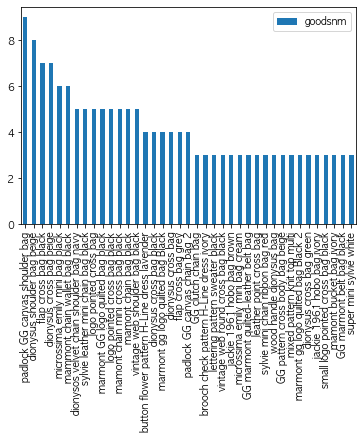

In [178]:
df_copy_goodsnm = pd.DataFrame(df_copy["goodsnm"].value_counts())
df_copy_goodsnm[df_copy_goodsnm["goodsnm"] >2].plot(kind="bar")

In [180]:
df_copy_goodsnm.index

Index(['padlock GG canvas shoulder bag', 'dionysus shoulder bag beige',
       'flap cross bag black', 'dionysus cross bag beige',
       'microssima emily mini bag black', 'mammont chain wallet bag black',
       'dionysos velvet chain shoulder bag navy',
       'sylvie leather mini chain bag black', 'logo pointed cross bag',
       'marmont GG logo quilted bag black', 'logo pointed cross bag black',
       'mamont chain mini cross bag black', 'mamont chain bag black',
       'vintage web shoulder bag black',
       'button flower pattern H-Line dress lavender',
       'dionysus cross bag black', 'marmont gg logo quilted bag Black',
       'dionysus cross bag', 'flap cross bag grey',
       'padlock GG canvas chain bag 2', 'GG clutch chain bag',
       'brooch check pattern H-Line dress ivory',
       'lettering pattern sweater black', 'vintage web round cross bag black',
       'jackie 1961 hobo bag brown', 'microssima emily mini bag cream',
       'GG marmont quilted-leather belt ba

### TOP 3 비교 - 결과

#### 모집단 
padlock GG canvas shoulder bag > <br>
dionysus shoulder bag beige ><br>
flap cross bag black'& 'dionysus cross bag beige

#### TS그룹 
dionysus cross bag beige > <br>
padlock GG canvas shoulder bag & microssima emily mini bag black > <br>
'button flower pattern H-Line dress lavender'& 'flap cross bag black'&'dionysus shoulder bag beige'


dionysus cross bag beige<br>
TS그룹에서는 1위 상품 모집단에서는 3위 상품 

padlock GG canvas shoulder bag <br>
TS그룹에서는 2위 상품 모집단에서는 1위 상품 

microssima emily mini bag black <br>
TS그룹에서는 2위 상품  모집단에서는 4위 상품

button flower pattern H-Line dress lavender <br>
TS그룹에서는 3위 상품
모집단에서는 5위 상품 

flap cross bag black <br>
TS그룹에서는 3위 상품 모집단에서도 3위 상품 

dionysus shoulder bag beige<br>
TS그룹에서는 3위상품 모집단에서는 2위 상품

#### 결과: 구찌 상품에서 dionysus cross bag beiged와 button flower pattern H-Line dress lavender은 TS그룹이 모집단에 비해 더 선호하는 상품이다.

### TA - Gucci

#### TA - Gucci - goodsnm

<AxesSubplot:>

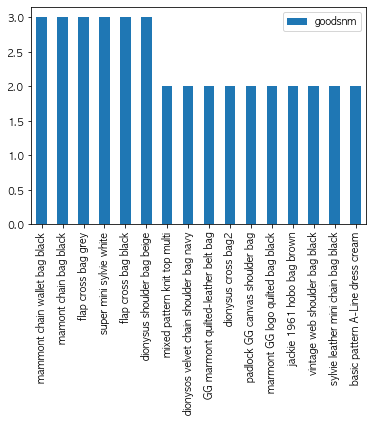

In [184]:
df_TA_copy = df_TA.copy()
df_TA_copy = df_TA_copy .query('brandnm == "Gucci"')
df_TA_copy_goodsnm = pd.DataFrame(df_TA_copy["goodsnm"].value_counts())
df_TA_copy_goodsnm[df_TA_copy_goodsnm["goodsnm"] >1].plot(kind="bar")

In [186]:
df_TA_copy_goodsnm["goodsnm"].index

Index(['mammont chain wallet bag black', 'mamont chain bag black',
       'flap cross bag grey', 'super mini sylvie white',
       'flap cross bag black', 'dionysus shoulder bag beige',
       'mixed pattern knit top multi',
       'dionysos velvet chain shoulder bag navy',
       'GG marmont quilted-leather belt bag', 'dionysus cross bag2',
       'padlock GG canvas shoulder bag', 'marmont GG logo quilted bag black',
       'jackie 1961 hobo bag brown', 'vintage web shoulder bag black',
       'sylvie leather mini chain bag black',
       'basic pattern A-Line dress cream', 'mamont chain bag red',
       'ophidia GG mini bag', 'sylvie mini chain ribbon bag red',
       'GG marmont belt bag bluegreen', 'leather pointed half sleeve dress',
       'brooch check pattern H-Line dress ivory',
       'vintage web round cross bag black', 'stripe pattern pointed cardigan',
       'mamont bucket bag ivory', 'pattern pointed a-line skirts',
       'marmont gg logo quilted bag Black',
       'mar

### TOP 3 비교 - 결과

### 모집단

padlock GG canvas shoulder bag > <br>
dionysus shoulder bag beige ><br>
flap cross bag black'& 'dionysus cross bag beige

mammont chain wallet bag black <br>
TA그룹 1위 상품 모집단 4위 상품 

mamont chain bag black <br>
TA그룹 1위 상품 모집단 4위 상품

mamont chain bag black<br>
TA그룹 1위 상품 모집단 6위 상품 

super mini sylvie white <br>
TA그룹 1위 상품 모집단 7위 상품

flap cross bag grey<br>
TA그룹 1위 상품 모집단 6위 상품

dionysus shoulder bag beige <br>
TA그룹에서 1위 TS그룹에서는 3위상품 모집단에서는 2위 상품

### TB - Gucci

#### TB - Gucci _ goodsnm

<AxesSubplot:>

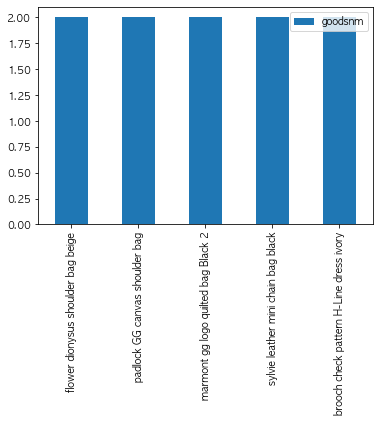

In [189]:
df_TB_copy = df_TB.copy()
df_TB_copy = df_TB_copy .query('brandnm == "Gucci"')
df_TB_copy_goodsnm = pd.DataFrame(df_TB_copy["goodsnm"].value_counts())
df_TB_copy_goodsnm[df_TB_copy_goodsnm["goodsnm"] >1].plot(kind="bar")

In [192]:
df_TB_copy_goodsnm.index

Index(['flower dionysus shoulder bag beige', 'padlock GG canvas shoulder bag',
       'marmont gg logo quilted bag Black 2',
       'sylvie leather mini chain bag black',
       'brooch check pattern H-Line dress ivory',
       'mamont chain mini cross bag black', 'jackie 1961 hobo bag ivory',
       'dionysus cross bag', 'dionysus cross bag green',
       'marmont GG logo quilted bag black',
       'sylvie leather mini chain bag red', 'logo pointed cross bag',
       'lettering point two way bag brown', 'dionysus shoulder bag beige',
       'Mickeymouse Round Shoulder Bag', 'GG supreme clutch brown',
       'dionysus cross bag black', 'mixed pattern knit top multi',
       'monogram mammont chain bag black', 'logo pointed cross bag black'],
      dtype='object')

### TOP 3 비교 - 결과

### 모집단

padlock GG canvas shoulder bag >
dionysus shoulder bag beige >
flap cross bag black'& 'dionysus cross bag beige

flower dionysus shoulder bag beige <br>
TB 1위 상품 모집단 10위 밖 상품 

padlock GG canvas shoulder bag <br>
TB 1위 상품 모집단 1위 상품 

marmont gg logo quilted bag Black 2 <br>
TB 1위 상품 모집단 7위 상품 

sylvie leather mini chain bag black<br>
TB 1위 상품 모집단 5위 상품 

brooch check pattern H-Line dress ivory <br>
TB1위 상품 모집단 7위 상품 

### TC -goodsname

In [198]:
df_TC["brandnm"].values

array(['Prada', 'Molliolli', 'Sandro', 'Plastic Island', 'Celine',
       'Christian Dior', 'Escada', 'Saint Laurent', 'Yves Saint Laurent',
       'Yves Saint Laurent', 'Delvaux', 'Louis Vuitton', 'Fendi',
       'JDC Lucky Chouette', 'Saint Laurent', 'Burberry', 'Prada',
       'El estilo de Claire', 'Chloe', 'Louis Vuitton', 'Balenciaga',
       'Prada', 'The Centaur', 'Leah', 'Rosa.K', 'Michael Michael Kors',
       'Sandro', 'Time', 'Collabotory', 'Vivienne Westwood', 'Mojosphine',
       'Sorry Too Much Love', 'Dewl', 'Valentino', 'Rouje', 'Chloe',
       'Gucci', 'Louis Vuitton', 'Saint Laurent', 'A.P.C.', 'Celine',
       'Allsaints', 'And You', 'Valentino', 'Dint', 'Gucci', 'Fayewoo',
       'Kenzo', 'Chloe', 'Cesare Paciotti', 'Andersson Bell', 'Sandro',
       'Michaa', 'Michaa', 'Anna Sui', 'Lucky Chouette', 'Maje',
       'Balmain', 'Recto.', 'Max Mara', 'Yves Saint Laurent'],
      dtype=object)